Being able to find groups of similar data that exist in your dataset can be extremely valuable. If you are trying to find its undelying meaning. If you were a store owner and you wanted to understand which custers are more valuable without a set idea of what valuable is, clustering would be a great place to start to find patterns in your data. You may have a few high-level ideas of what denotes a valuable customer but you are not entirely sure in the face of a large mountain of available data. Through clustering you can find commoalities among similar groups in your data. If you look more deeply at a cluster of similar people, you may learn that everyone in that group visits your website for longer periods of time than others. This can show you waht the value is and also provide a clean sample size for fugure supervised learning experiments

One of the most basic yet popular approaches is by using a cluster analysis called k-means clustering. k-means works by searching for k clusters in your data and the workflow is actually quite intuitive- we will start with the no-math introduction to k-means, followed by an implementation in python.

The no-math algorithm of k-means clustering is shown here:


1.   Pick K centroids (K - expected distinct number of clusters)
2.   Randomly place K centroids anywhere amongst your existing training data.
1.   Calculate the Euclidean distance from each centroid to all the points in your training data
1.   Trainging data points get grouped in with their nearest centroid
2.   Amongst data points group into each centroid, calculate nthe mean data point and move yyour centroid to that location.
1.   Repeat this process until convergence or when the membership in each group no longer changes.









In [1]:
# Implementing k-means from Scratch
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# Gnerate a random cluster dataset to experiment on X= cooridnate points and y =cluster labels and define random centroid
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, random_state=800)
centroids = [[-6,2],[3,-4],[-5,10]]

In [3]:
X

array([[-3.83458347,  6.09210705],
       [-4.62571831,  5.54296865],
       [-2.87807159, -7.48754592],
       ...,
       [-3.709726  , -7.77993633],
       [-8.44553266, -1.83519866],
       [-4.68308431,  6.91780744]])

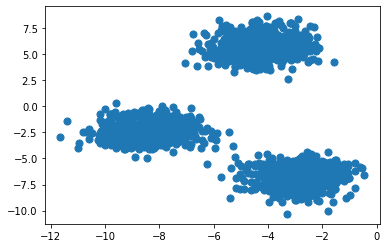

In [4]:
# Plot the coordiante points
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='tab20b')
plt.show()

In [5]:
y

array([2, 2, 1, ..., 1, 0, 2])

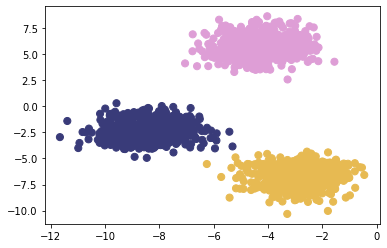

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y,  s=50, cmap='tab20b')

**K-means with Optimization**

We will depend on the SciPy library, a python package that allows easy access to highly optimized versions of scientific calcilations. 


In here we will implement Euclidean distance with cdist, the functionally of which replicates the barebons implementations of our distance metric in a much more efficient case.

In [7]:
# Implementing non-vectorized Euclidean distance
def dist(a,b):
  return math.sqrt(math.pow(a[0]-b[0],2) + math.pow(a[1]-b[1],2))

In [8]:
# Implementing the optimized Euclidean distance
from scipy.spatial.distance import cdist
# Store values of X 
X[105:110]

array([[-3.09897933,  4.79407445],
       [-3.37295914, -7.36901393],
       [-3.372895  ,  5.10433846],
       [-5.90267987, -3.28352194],
       [-3.52067739,  7.7841276 ]])

In [9]:
# We need to calculate distances and choose the index of the shortest distance as a cluster:
for x in X[105:110]:
  calcs = []
  for c in centroids:
    calcs.append(dist(x,c))
  print(calcs, "Cluster Membership: ", np.argmin(calcs, axis = 0))

[4.027750355981394, 10.70202290628413, 5.542160268055164] Cluster Membership:  0
[9.73035280174993, 7.208665829113462, 17.44505393393603] Cluster Membership:  1
[4.066767506545852, 11.113179986633003, 5.1589701124301515] Cluster Membership:  0
[5.284418164665783, 8.931464028407861, 13.314157359115697] Cluster Membership:  0
[6.293105164930943, 13.467921029846712, 2.664298385076878] Cluster Membership:  2


In [10]:
def k_means(X, K):
#Keep track of history so you can see K-means in action
    centroids_history = []
    labels_history = []
    rand_index = np.random.choice(X.shape[0], K)  
    centroids = X[rand_index]
    centroids_history.append(centroids)
    while True:
# Euclidean distances are calculated for each point relative to centroids, #and then np.argmin returns
# the index location of the minimal distance - which cluster a point    is #assigned to
        labels = np.argmin(cdist(X, centroids), axis=1)
        labels_history.append(labels)
#Take mean of points within clusters to find new centroids:
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                for i in range(K)])
        centroids_history.append(new_centroids)
        
        # If old centroids and new centroids no longer change, K-means is complete and end. Otherwise continue
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels, centroids_history, labels_history

centers, labels, centers_hist, labels_hist = k_means(X, 3)

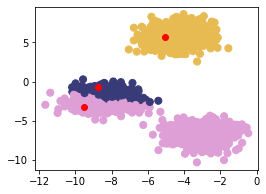

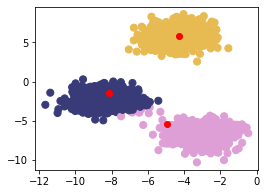

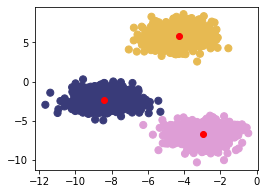

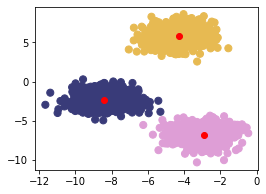

In [11]:
history = zip(centers_hist, labels_hist)

for x, y in history:
    plt.figure(figsize=(4,3))
    plt.scatter(X[:, 0], X[:, 1], c=y,
            s=50, cmap='tab20b');
    plt.scatter(x[:, 0], x[:, 1], c='red')
    plt.show()

**Explanation**

As you can see from the above image, k-means takes an iterative approach to refining optimal clusters based on distance. The algorithm starts with random initilization adn depending on the complexity of the data, qickly finds the seperations that make the most sense